In [70]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
#importing raw data
jobs_original = pd.read_csv('./data/all_ind_melbourne.csv')
jobs_original.head()

,company,company_rating,industry,job_description_all_text,job_title,salary_data_text
0,ANZ Banking Group,4.1,data,"Consultant Data Scientist – Data Activation, M...",Data Scientist Consultant,NaN
1,NAB - National Australia Bank,3.8,data,Work type: Permanent Full time\nLocation: Aust...,Data Scientist,NaN
2,ANZ Banking Group,4.1,data,The Team\n\nThe Customer Service Operations Au...,Senior Data Scientist,NaN
3,NAB - National Australia Bank,3.8,data,Work type: Permanent Full time\nLocation: Aust...,Data Analytics Engineer,NaN
4,Coles,3.8,data,About Us\n\nThe Digital team is focused on rei...,Data Scientist,NaN


In [50]:
import pandas_profiling
pandas_profiling.ProfileReport(jobs_original)

Number of variables,7
Number of observations,12957
Total Missing (%),17.3%
Total size in memory,708.7 KiB
Average record size in memory,56.0 B
Numeric,0
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [51]:
#looks like we have a lot of duplicate jobs
#not surprising from general scraping
for column in jobs_original.columns:
    print(column, jobs_original.duplicated(subset=column).sum() )


company 10804
company_rating 12927
industry 12949
job_description_all_text 7382
job_title 8337
salary_data_text 12436
location 12956


In [52]:
#starting by dropping all fully duplicate columns
jobs_original.drop_duplicates(keep='first').shape

(6023, 7)

In [53]:
#looks like this loses us over half our data!
jobs_nona = jobs_original.drop_duplicates(keep='first')

In [54]:
pandas_profiling.ProfileReport(jobs_nona)

Number of variables,8
Number of observations,6023
Total Missing (%),15.3%
Total size in memory,376.5 KiB
Average record size in memory,64.0 B
Numeric,1
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [55]:
#fully duplicated description text is likely to be a true duplicate
duplicate_jds = jobs_nona[jobs_nona.duplicated(subset='job_description_all_text')]

In [56]:
pandas_profiling.ProfileReport(duplicate_jds)

Number of variables,8
Number of observations,448
Total Missing (%),15.2%
Total size in memory,28.1 KiB
Average record size in memory,64.2 B
Numeric,1
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [57]:
#does look like some may be the same job advertised with various titles
#why are only 37 of these considered duplicated, when all of them were before?
duplicate_jds.duplicated('job_description_all_text').sum()

37

In [58]:
import missingno

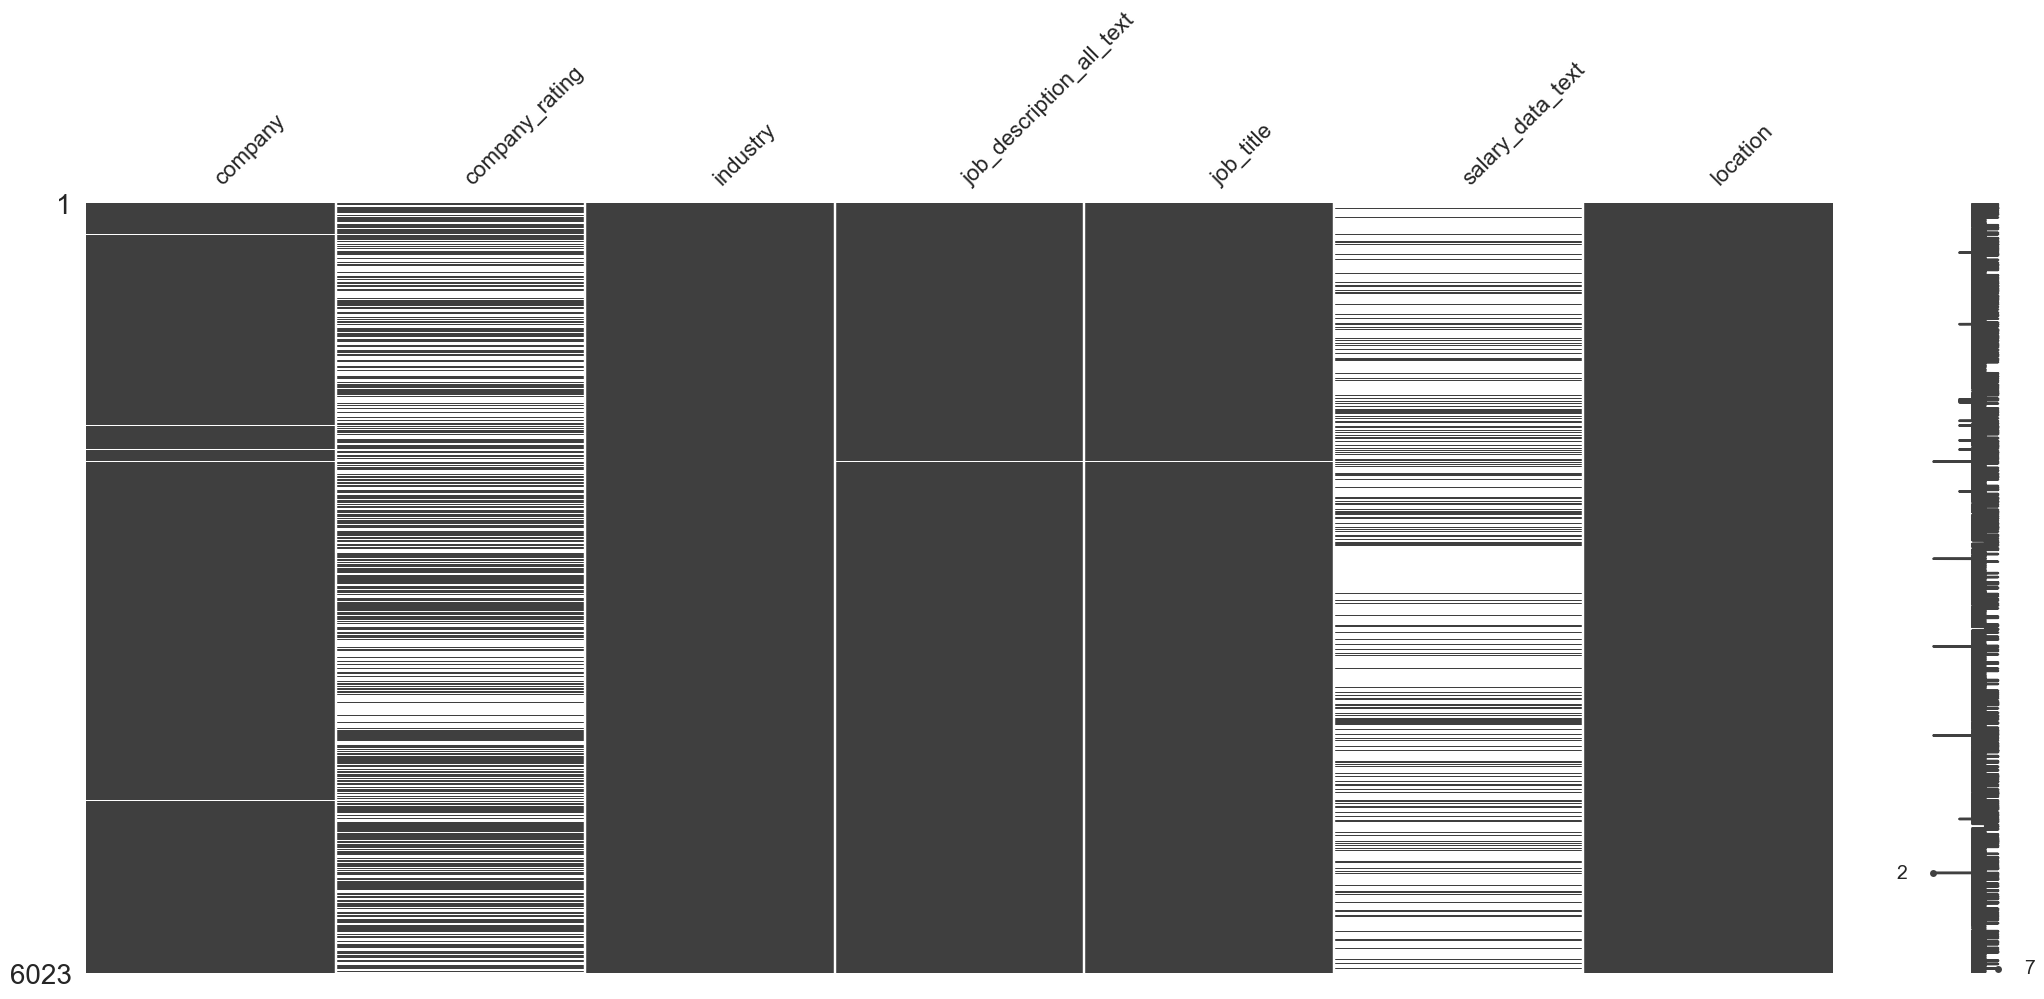

In [59]:
missingno.matrix(jobs_nona)

In [60]:
#company rating and salary are expected to be sparse
#company is not really essential, so not concerned about missing values there
#can't do much if jd text is missing, so will drop those

jobs_nona = jobs_nona.dropna(subset=['job_description_all_text'])
jobs_nona.isna().sum()

company                       16
company_rating              2679
industry                       0
job_description_all_text       0
job_title                      0
salary_data_text            4649
location                       0
dtype: int64

In [61]:
# Given that only 16 are missing in company, let's look at those
jobs_nona[jobs_nona.company.isna()]

,company,company_rating,industry,job_description_all_text,job_title,salary_data_text,location
490,NaN,NaN,data,The opportunity Our client who is a market lea...,Salesforce Business Analyst,$750 - $850 a day,Melbourne
806,NaN,NaN,data,Do you have a passion for helping people with ...,Helpdesk Support Analyst – Inner Northern Subu...,NaN,Melbourne
2263,NaN,NaN,data,Port Melbourne Location Full-Time Perm Role Gr...,Help Desk Analyst - Level 2,NaN,Melbourne
2413,NaN,NaN,data,An exciting position as a Senior Sales Analyst...,Senior Sales Analyst,$600 - $640 a day,Melbourne
3973,NaN,NaN,construction,We are Melbourne based specialist contractors ...,Amrick Specialist Contractors – Construction L...,NaN,Melbourne
3994,NaN,NaN,construction,We are a team of contractors providing special...,Construction Labourer – APPLY NOW,NaN,Melbourne
4015,NaN,NaN,construction,We are Melbourne based specialist contractors ...,Amrick Specialist Contractors – Ticketed Labou...,NaN,Melbourne
4343,NaN,NaN,construction,"Stable company, full time roles available\nOve...",Forklift Driver / Labourer / Machine Operator,NaN,Melbourne
4427,NaN,NaN,construction,We are specialist contractors that are current...,Amrick Specialist Contractors – South Eastern/...,NaN,Melbourne
4693,NaN,NaN,construction,A great opportunity exists for a Senior Associ...,Construction and Infrastructure Senior Associa...,NaN,Melbourne


In [62]:
duplicate_jds[duplicate_jds.duplicated('job_description_all_text')]

,company,company_rating,industry,job_description_all_text,job_title,salary_data_text,location
3218,Robert Half Australia,3.9,data,The Company\n\nAn exciting opportunity has ari...,Business Analyst,NaN,Melbourne
5655,SMAART Recruitment,NaN,manufacturing,SMAART Recruitment are proud to partner with a...,Service Desk Analyst - Level 1,"$55,000 a year",Melbourne
7737,Delaware North Companies,NaN,hospitality,Food and Beverage Attendants\nExcellent Hospit...,F&B Attendant - Working Holiday Visa Welcome,NaN,Melbourne
7748,Delaware North Companies,3.7,hospitality,Food and Beverage Attendants\nExcellent Hospit...,F&B Attendant - Working Holiday Visa Welcome,NaN,Melbourne
7762,Starbucks,4 o,hospitality,Gigantic possibilities lie ahead – to grow as ...,Barista- Spencer Street,NaN,Melbourne
7811,Starbucks,4 o,hospitality,Gigantic possibilities lie ahead – to grow as ...,Barista- Bourke St,NaN,Melbourne
7826,NaN,NaN,hospitality,NaN,NaN,NaN,Melbourne
7929,Starbucks,4 o,hospitality,Gigantic possibilities lie ahead – to grow as ...,Barista- Chadstone,NaN,Melbourne
8303,L'Oreal USA,NaN,hospitality,ABOUT THE JOB\nPermanent Part Time opportunity...,Kiehl's Customer Representative - Myer Melbourne,NaN,Melbourne
8491,Hungry Jack's,3.4,hospitality,Global Brand\nManagement and succession traini...,Assistant Manager,NaN,Melbourne


In [63]:
#may still be some duplicates, but many appear to be using similar text to hire for multiple roles 
#or hiring for the same jobs in multiple locations or functions, so leaving remaining in for now

In [64]:
#need to convert rating to float
jobs_nona.company_rating.unique()

array(['4.1', '3.8', '4 o', nan, '4.2', '3.9', '3.7', '3.5', '3.3', '3.4',
       '3.6', '5 o', '4.4', '4.3', '3.2', '3 o', '4.7', '2.7', '3.1',
       '4.8', '4.6', '4.5', '2 o', '2.6', '2.9', '2.4', '1 o', '2.8',
       '1.7', '2.5'], dtype=object)

In [65]:
float_ratings = []
for rating in jobs_nona.company_rating:
    try:
        float_ratings.append(float(rating))
    except:
        new_rating = rating.replace(' ', '.')
        new_rating = new_rating.replace('o', '0')
        float_ratings.append(float(new_rating))

jobs_nona.company_rating = float_ratings
jobs_nona.company_rating.unique()

array([4.1, 3.8, 4. , nan, 4.2, 3.9, 3.7, 3.5, 3.3, 3.4, 3.6, 5. , 4.4,
       4.3, 3.2, 3. , 4.7, 2.7, 3.1, 4.8, 4.6, 4.5, 2. , 2.6, 2.9, 2.4,
       1. , 2.8, 1.7, 2.5])

In [69]:
#format salary data
#$$ amount
#per time (day, week, month, year, hour)

# columns: base_dollars
# pay_period:
# full_time_annual_dollars

test_strings = {'job':['A','B','C','D','E','F'],
    'salary':['30 - 60 per hour', '$45 per hour', '65000 per year', '65000-80000 per year', '7000 per month','$500 per week']}
test_df = pd.DataFrame(test_strings)
test_df

,job,salary
0,A,30 - 60 per hour
1,B,$45 per hour
2,C,65000 per year
3,D,65000-80000 per year
4,E,7000 per month
5,F,$500 per week


In [92]:
test_numbers = [re.findall('\d*', salary) for salary in test_df.salary]
test_numbers


[['30', '', '', '', '60', '', '', '', '', '', '', '', '', '', ''],
 ['', '45', '', '', '', '', '', '', '', '', '', ''],
 ['65000', '', '', '', '', '', '', '', '', '', ''],
 ['65000', '', '80000', '', '', '', '', '', '', '', '', '', ''],
 ['7000', '', '', '', '', '', '', '', '', '', '', ''],
 ['', '500', '', '', '', '', '', '', '', '', '', '']]

In [ ]:
pay_lengths = ['hour','day','week','month','year']
test_times = [re.findall('\d*', salary) for salary in test_df.salary]
